# [de Boer+ 2019](https://ui.adsabs.harvard.edu/abs/2019MNRAS.485.4906D/abstract), [data](https://github.com/tdboer/GC_profiles/tree/f31e147c1ac2de11146d421f261cc620340ae9a9)

In [1]:
if "logger" in globals() and  len(logger.handlers) >= 1:
    # To suppress debug output from the logger defined in .ipython/profile_default/ipython_config.py
    logger.handlers.pop()

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
import numpy
import logging
import numpy as np
import astropy.units as u
import astropy.constants as const
import astropy.coordinates as coord
import colorcet
import matplotlib
from matplotlib import pyplot
from matplotlib import pyplot as plt
pyplot.style.use("tlrh")

# This repo: src folder /w Python scripts
sys.path.append("../src")
# Other repos linked into the notebook container ;-)
sys.path.append("/supaharris")
from utils import convert_gc_names_from_sh_to_any
from data.parse_deBoer_2019 import parse_deBoer_2019_fits
from data.parse_deBoer_2019 import parse_deBoer_2019_member_stars
from data.parse_deBoer_2019 import parse_deBoer_2019_stiched_profiles
sys.path.append("/supaharris-client")
from supaharrisclient.units import arcmin2parsec
from supaharrisclient.units import parsec2arcmin
from supaharrisclient.utils import suppress_stdout
from supaharrisclient.client import SupaHarrisClient
sys.path.append("/auriga/src")
from mw_m31_gc_observations import read_MWandM31_data
MW_h96e10, MW_v13, M31_c11, M31_cr16 = read_MWandM31_data()
sys.path.append("/limepy")
import limepy

logging.basicConfig(stream=sys.stdout, format="%(message)s")
logger = logging.getLogger(); logger.level = logging.INFO
for h in logger.handlers: h.setLevel(logger.level)

In [3]:
deBoer_fits = parse_deBoer_2019_fits(logger)

print(deBoer_fits.shape)
print(deBoer_fits.dtype)
print(deBoer_fits["id"])

(81,)
[('id', '<U12'), ('W_lime', '<f8'), ('e_W_lime', '<f8'), ('g_lime', '<f8'), ('e_g_lime', '<f8'), ('rt_lime', '<f8'), ('e_rt_lime', '<f8'), ('M_lime', '<f8'), ('e_M_lime', '<f8'), ('W_pe', '<f8'), ('e_W_pe', '<f8'), ('eta_pe', '<f8'), ('e_eta_pe', '<f8'), ('log1minB_pe', '<f8'), ('e_log1minB_pe', '<f8'), ('rt_pe', '<f8'), ('e_rt_pe', '<f8'), ('M_pe', '<f8'), ('e_M_pe', '<f8'), ('W_king', '<f8'), ('e_W_king', '<f8'), ('rt_king', '<f8'), ('e_rt_king', '<f8'), ('M_king', '<f8'), ('e_M_king', '<f8'), ('W_wil', '<f8'), ('e_W_wil', '<f8'), ('rt_wil', '<f8'), ('e_rt_wil', '<f8'), ('M_wil', '<f8'), ('e_M_wil', '<f8'), ('log_fpe', '<f8'), ('e_log_fpe', '<f8'), ('chi2_king', '<f8'), ('chi2red_king', '<f8'), ('chi2_wil', '<f8'), ('chi2red_wil', '<f8'), ('chi2_lime', '<f8'), ('chi2red_lime', '<f8'), ('chi2_pe', '<f8'), ('chi2red_pe', '<f8'), ('kingtrunc', '<f8'), ('kinghalf', '<f8'), ('wiltrunc', '<f8'), ('wilhalf', '<f8'), ('limehalf', '<f8'), ('e_limehalf', '<f8'), ('pehalf', '<f8'), ('e_pe

In [4]:
deBoer_member_stars = parse_deBoer_2019_member_stars(logger)

print(len(deBoer_member_stars))
print(deBoer_member_stars["NGC 1261"].shape)
print(deBoer_member_stars["NGC 1261"].dtype)
print(deBoer_member_stars.keys())

81
(714,)
[('ra', '<f8'), ('dec', '<f8'), ('xi_gc', '<f8'), ('xn_gc', '<f8'), ('ellrad_gc', '<f8'), ('pmra', '<f8'), ('pmra_error', '<f8'), ('pmdec', '<f8'), ('pmdec_error', '<f8'), ('parallax', '<f8'), ('parallax_error', '<f8'), ('phot_g_mean_mag', '<f8'), ('phot_g_mean_mag_error', '<f8'), ('phot_bp_mean_mag', '<f8'), ('phot_bp_mean_mag_error', '<f8'), ('phot_rp_mean_mag', '<f8'), ('phot_rp_mean_mag_error', '<f8'), ('phot_bp_rp_excess_factor', '<f8'), ('Ag', '<f8'), ('Abp', '<f8'), ('Arp', '<f8'), ('pmra_pmdec_corr', '<f8'), ('source_id', '<f8'), ('prob', '<f8')]
dict_keys(['IC 1276', 'NGC 7006', 'NGC 7078', 'NGC 6624', 'NGC 5286', 'NGC 7089', 'NGC 2808', 'NGC 6333', 'NGC 362', 'NGC 6101', 'NGC 288', 'NGC 7492', 'NGC 5466', 'NGC 6779', 'NGC 6352', 'NGC 5904', 'NGC 6366', 'NGC 6388', 'IC 4499', 'NGC 6715', 'Pal 2', 'NGC 6426', 'NGC 3201', 'NGC 7099', 'NGC 5139', 'NGC 1851', 'NGC 1904', 'NGC 6864', 'NGC 6218', 'NGC 5272', 'NGC 6723', 'NGC 6496', 'NGC 4147', 'NGC 6362', 'NGC 6539', 'Pal 

In [5]:
deBoer_stitched_profiles = parse_deBoer_2019_stiched_profiles(logger)

print(len(deBoer_stitched_profiles))
print(deBoer_stitched_profiles["NGC 1261"].shape)
print(deBoer_stitched_profiles["NGC 1261"].dtype)
print(deBoer_stitched_profiles.keys())

81
(74,)
[('rad', '<f8'), ('density', '<f8'), ('density_err', '<f8')]
dict_keys(['NGC 288', 'IC 4499', 'NGC 6584', 'NGC 6121', 'NGC 6715', 'NGC 2419', 'NGC 6934', 'NGC 6273', 'NGC 6723', 'NGC 6809', 'NGC 5986', 'NGC 6541', 'NGC 6266', 'NGC 6284', 'NGC 6341', 'NGC 1851', 'NGC 6325', 'NGC 4147', 'Pal 11', 'NGC 7089', 'NGC 5904', 'NGC 6752', 'NGC 6205', 'NGC 5897', 'NGC 1904', 'NGC 6652', 'Pal 1', 'NGC 5024', 'Pal 8', 'NGC 6293', 'NGC 7006', 'NGC 6362', 'Terzan 8', 'NGC 6569', 'NGC 6496', 'NGC 6388', 'NGC 2298', 'NGC 5824', 'NGC 6366', 'NGC 1261', 'NGC 7492', 'NGC 104', 'NGC 6626', 'NGC 6779', 'NGC 5139', 'NGC 6144', 'NGC 6352', 'NGC 6717', 'NGC 5634', 'NGC 6171', 'NGC 6101', 'NGC 6624', 'NGC 6539', 'NGC 6864', 'IC 1276', 'NGC 6637', 'NGC 6333', 'NGC 6229', 'NGC 7078', 'NGC 5053', 'NGC 6402', 'NGC 6981', 'NGC 7099', 'NGC 6681', 'NGC 2808', 'NGC 5286', 'Pal 12', 'NGC 362', 'NGC 6397', 'NGC 5466', 'NGC 6139', 'NGC 6235', 'NGC 6656', 'NGC 6218', 'NGC 4590', 'NGC 3201', 'NGC 6426', 'NGC 6254'

In [6]:
pmra = deBoer_member_stars["NGC 1261"]["pmra"]
pmdec = deBoer_member_stars["NGC 1261"]["pmdec"]
prob = deBoer_member_stars["NGC 1261"]["prob"]

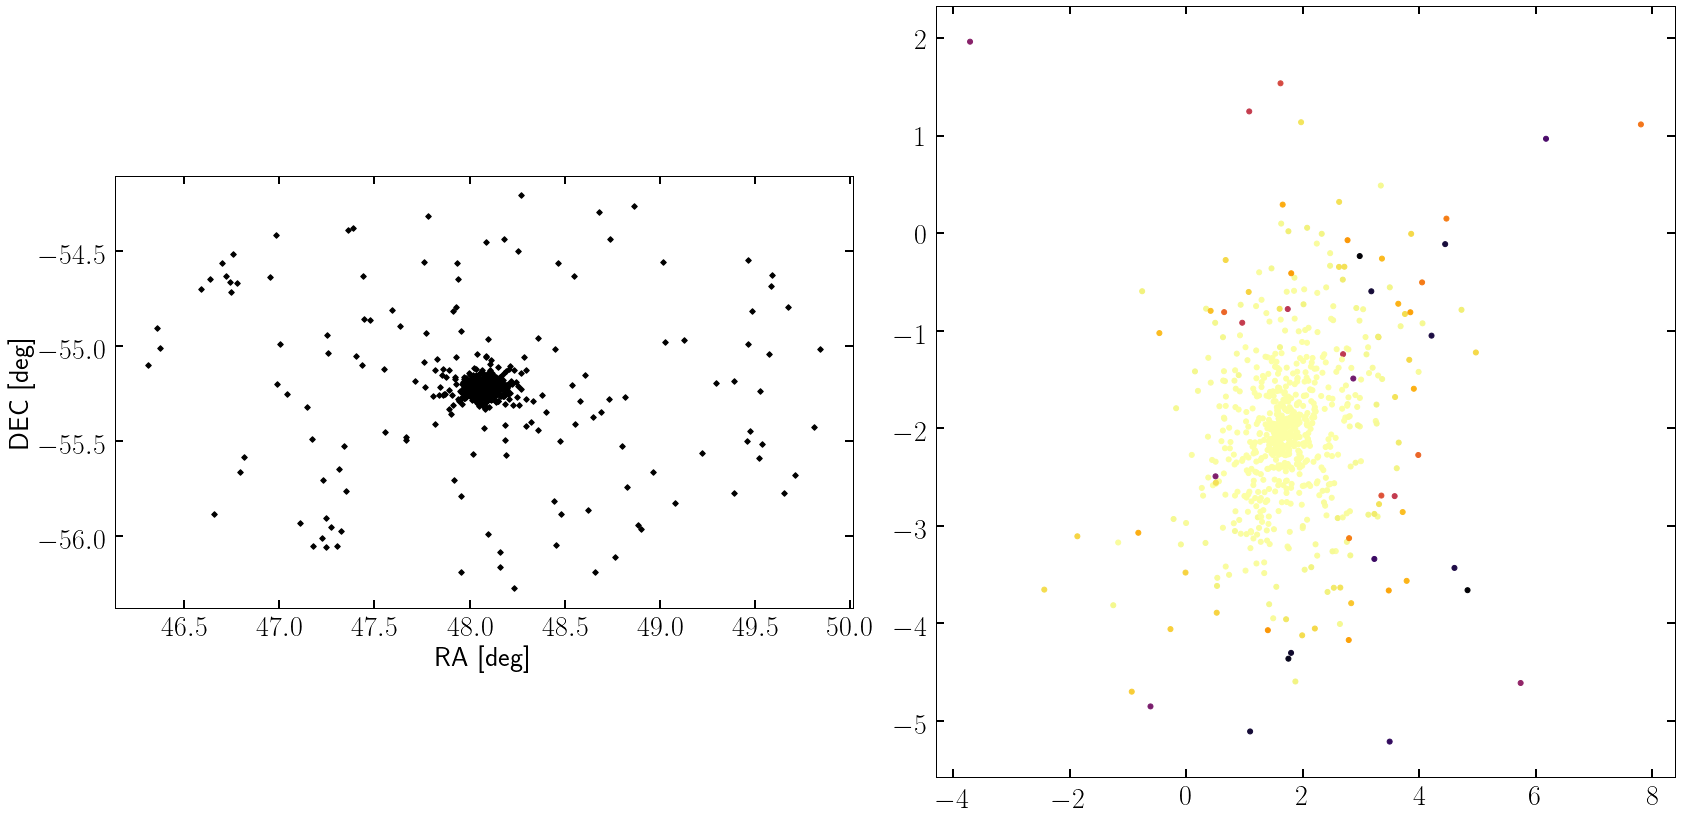

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(24, 12))

ax1.plot(deBoer_member_stars["NGC 1261"]["ra"], deBoer_member_stars["NGC 1261"]["dec"], "kD", ms=4)
ax1.set_xlabel("RA [deg]")
ax1.set_ylabel("DEC [deg]")
ax1.set_aspect(1)

pyplot.sca(ax2)
pyplot.scatter(
    deBoer_member_stars["NGC 1261"]["pmra"],
    deBoer_member_stars["NGC 1261"]["pmdec"],
    c=deBoer_member_stars["NGC 1261"]["prob"], s=25, cmap="inferno"
)
# cntr = pyplot.contour(
#     [deBoer_member_stars["NGC 1261"]["pmra"],
#     deBoer_member_stars["NGC 1261"]["pmdec"]],
#     deBoer_member_stars["NGC 1261"]["prob"],
#     colors="black", linestyles="-", levels=1
# )
# divider = make_axes_locatable(ax2)
# cax = divider.append_axes("right", size="5%", pad=0.2)
# cax = pyplot.colorbar(ax=ax2, cax=cax)
# cax.ax.set_ylabel("Memb. Prob.")
# ax2.set_xlabel("$\mu_{\\text RA}$ [mas/yr]")
# ax2.set_ylabel("$\mu_{\\text DEC}$ [mas/yr]")
# ax2.set_aspect(1)


pyplot.tight_layout()
pyplot.show(fig)

W_king                        8.582 +/-   0.026
rt_king                      52.496 +/-   0.489
M_king                   107803.319 +/- 1202.242
kinghalf                      5.754
kingtrunc                    52.496
chi2_king                  4097.375
chi2red_king                 28.064

 No G provided, set to default: G = 0.004302
 Model scaled to: G = 0.004302, M = 107803.319, rt = 52.496

 Model properties: 
 ----------------- 
 phi0 =  8.58; g = 1.00
 Converged = True
 M =  1.078e+05; U = -4.063e+06; K = 2.032e+06; Q = 0.5000;  2Kr/Kt = 1.000
 rv/rh = 1.069; rh/r0 = 11.103; rt/r0 = 101.292; ra/rh = 9006670.067
King                          0.518
Half-mass                     5.754
virial                        6.152
truncation                   52.496

W_wil                         7.057 +/-   0.035
rt_wil                      200.915 +/-   6.700
M_wil                     91163.150 +/- 1738.225
wilhalf                       3.577
wiltrunc                    200.915
chi2_wil       

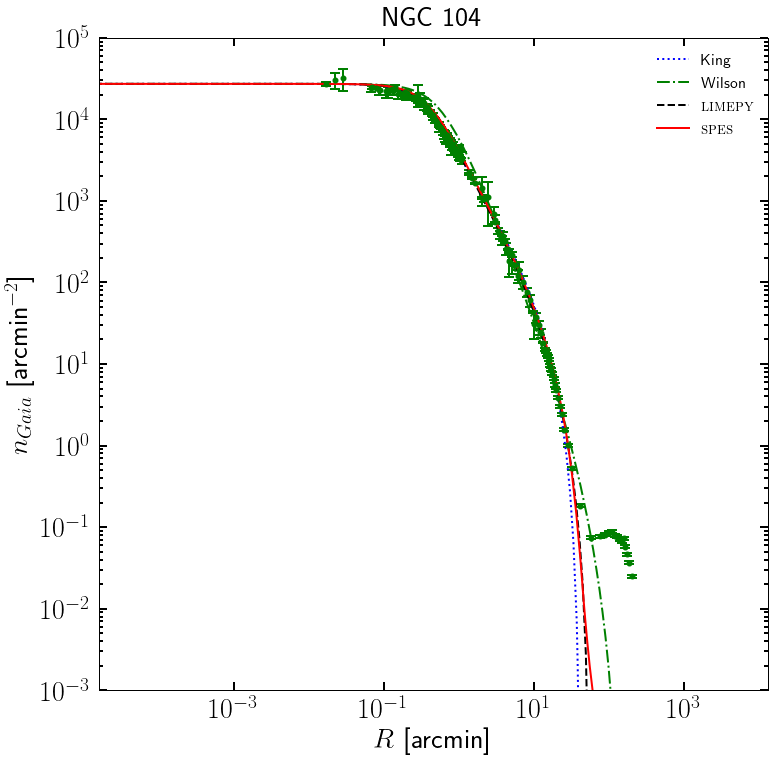

W_king                        4.607 +/-   0.041
rt_king                      46.315 +/-   0.472
M_king                     4353.574 +/-  24.366
kinghalf                      9.408
kingtrunc                    46.315
chi2_king                    74.907
chi2red_king                  1.189

 No G provided, set to default: G = 0.004302
 Model scaled to: G = 0.004302, M = 4353.574, rt = 46.315

 Model properties: 
 ----------------- 
 phi0 =  4.61; g = 1.00
 Converged = True
 M =  4.354e+03; U = -3.549e+03; K = 1.774e+03; Q = 0.5000;  2Kr/Kt = 1.000
 rv/rh = 1.221; rh/r0 =  1.816; rt/r0 =   8.941; ra/rh = 55066413.259
King                          5.180
Half-mass                     9.407
virial                       11.489
truncation                   46.315

W_wil                         3.474 +/-   0.079
rt_wil                       74.145 +/-   1.543
M_wil                      4391.503 +/-  30.271
wilhalf                       9.196
wiltrunc                     74.145
chi2_wil          

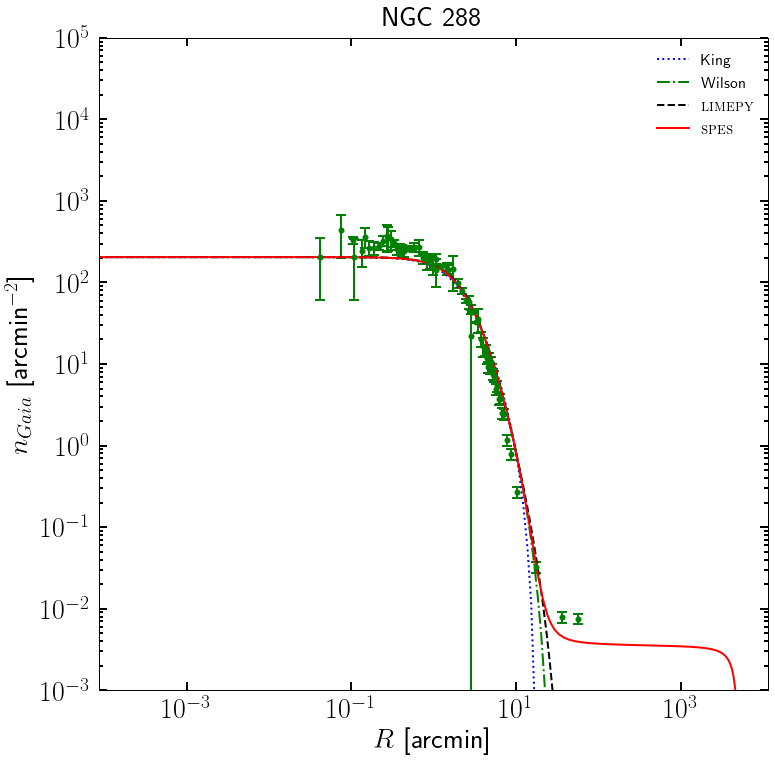

W_king                        7.936 +/-   0.034
rt_king                      26.086 +/-   0.422
M_king                    22869.201 +/- 517.776
kinghalf                      2.730
kingtrunc                    26.086
chi2_king                   917.866
chi2red_king                  9.662

 No G provided, set to default: G = 0.004302
 Model scaled to: G = 0.004302, M = 22869.201, rt = 26.086

 Model properties: 
 ----------------- 
 phi0 =  7.94; g = 1.00
 Converged = True
 M =  2.287e+04; U = -3.567e+05; K = 1.783e+05; Q = 0.5000;  2Kr/Kt = 1.000
 rv/rh = 1.156; rh/r0 =  6.816; rt/r0 =  65.135; ra/rh = 14671763.407
King                          0.400
Half-mass                     2.730
virial                        3.154
truncation                   26.086

W_wil                         6.726 +/-   0.011
rt_wil                       82.591 +/-   0.989
M_wil                     22515.666 +/- 169.471
wilhalf                       2.027
wiltrunc                     82.591
chi2_wil         

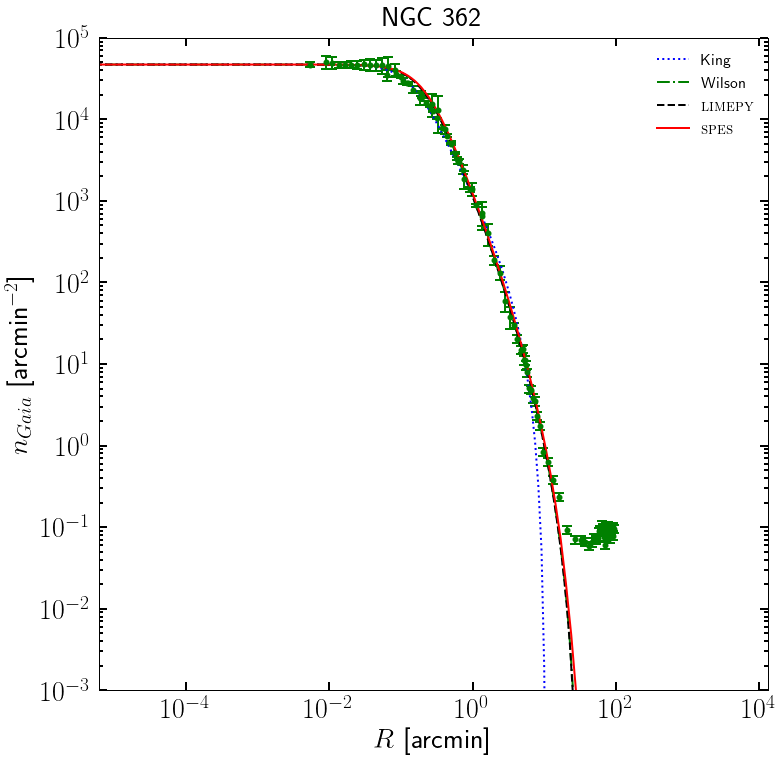

W_king                        6.801 +/-   0.170
rt_king                      37.810 +/-   1.814
M_king                     2753.313 +/- 165.328
kinghalf                      4.585
kingtrunc                    37.810
chi2_king                  1985.035
chi2red_king                 28.358

 No G provided, set to default: G = 0.004302
 Model scaled to: G = 0.004302, M = 2753.313, rt = 37.81

 Model properties: 
 ----------------- 
 phi0 =  6.80; g = 1.00
 Converged = True
 M =  2.753e+03; U = -2.870e+03; K = 1.435e+03; Q = 0.5000;  2Kr/Kt = 1.000
 rv/rh = 1.239; rh/r0 =  3.578; rt/r0 =  29.499; ra/rh = 27950970.583
King                          1.282
Half-mass                     4.586
virial                        5.682
truncation                   37.810

W_wil                         5.090 +/-   0.038
rt_wil                       61.868 +/-   1.226
M_wil                      3857.022 +/-  18.531
wilhalf                       4.476
wiltrunc                     61.868
chi2_wil           

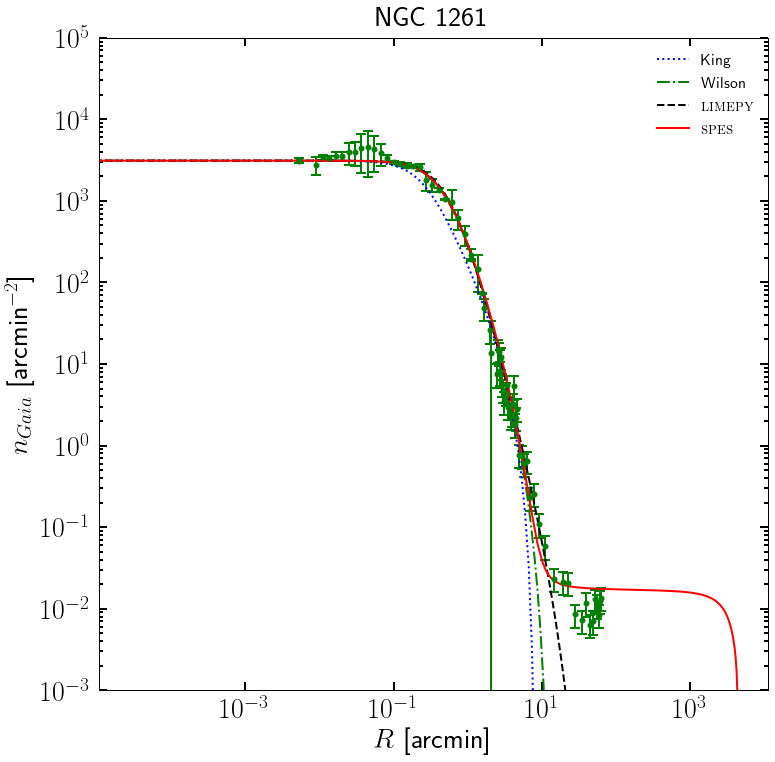

In [8]:
h96e10_id = numpy.array([n.decode("ascii") for n in MW_h96e10["ID"]])

for i, fit in enumerate(deBoer_fits):
    gc_name = fit["id"]
    # if gc_name != "NGC 1261": continue
    fig, ax = pyplot.subplots(1, 1, figsize=(12, 12))
    
    # Data
    n0 = deBoer_stitched_profiles[gc_name]["density"][0]  # central number density
    ax.text(0.5, 1.01, gc_name, ha="center", va="bottom", transform=ax.transAxes)
    ax.errorbar(
        deBoer_stitched_profiles[gc_name]["rad"], 
        deBoer_stitched_profiles[gc_name]["density"],
        yerr=deBoer_stitched_profiles[gc_name]["density_err"],
        marker="o", c="g", ls="", ms=4, elinewidth=2, markeredgewidth=2, capsize=5
    )
    
    # Need distance to convert from parsec to armin
    imatch, = numpy.where(h96e10_id == gc_name)[0]
    distance_kpc = MW_h96e10["R_Sun"][imatch]
    
    # King (1966)
    for king_param in [
        "W_king", "rt_king", "M_king" 
    ]:
        print("{0:<20s}{1:> 15.3f} +/- {2:>7.3f}".format(
            king_param, fit[king_param], fit["e_"+king_param])
        )
    print("{0:<20s}{1:> 15.3f}".format("kinghalf", fit["kinghalf"]))
    print("{0:<20s}{1:> 15.3f}".format("kingtrunc", fit["kingtrunc"]))
    print("{0:<20s}{1:> 15.3f}".format("chi2_king", fit["chi2_king"]))
    print("{0:<20s}{1:> 15.3f}\n".format("chi2red_king", fit["chi2red_king"]))
    # W must be phi0: central dimensionless potential
    # g: Order of truncation (0<= g < 3.5; 0=Woolley, 1=King, 2=Wilson)
    k = limepy.limepy(fit["W_king"], g=1, M=fit["M_king"], rt=fit["rt_king"],
        project=True, verbose=True)
    print("{0:<20s}{1:> 15.3f}".format("King", k.r0))
    print("{0:<20s}{1:> 15.3f}".format("Half-mass", k.rh))
    print("{0:<20s}{1:> 15.3f}".format("virial", k.rv))
    print("{0:<20s}{1:> 15.3f}\n".format("truncation", k.rt))
    # gc_l = limepy.sample(l, N=1337)
    ax.plot(parsec2arcmin(k.R, distance_kpc), n0*k.Sigma/numpy.mean(k.Sigma[0:3]),
        c="b", ls=":", lw=2, label="King")
   

    # Wilson
    for wilson_param in [
        "W_wil", "rt_wil", "M_wil" 
    ]:
        print("{0:<20s}{1:> 15.3f} +/- {2:>7.3f}".format(
            wilson_param, fit[wilson_param], fit["e_"+wilson_param])
        )
    print("{0:<20s}{1:> 15.3f}".format("wilhalf", fit["wilhalf"]))
    print("{0:<20s}{1:> 15.3f}".format("wiltrunc", fit["wiltrunc"]))
    print("{0:<20s}{1:> 15.3f}".format("chi2_wil", fit["chi2_wil"]))
    print("{0:<20s}{1:> 15.3f}\n".format("chi2red_wil", fit["chi2red_wil"]))
    # W must be phi0: central dimensionless potential
    # g: Order of truncation (0<= g < 3.5; 0=Woolley, 1=King, 2=Wilson)
    w = limepy.limepy(fit["W_wil"], g=2, M=fit["M_wil"], rt=fit["rt_wil"],
        project=True, verbose=True)
    print("{0:<20s}{1:> 15.3f}".format("King", w.r0))
    print("{0:<20s}{1:> 15.3f}".format("Half-mass", w.rh))
    print("{0:<20s}{1:> 15.3f}".format("virial", w.rv))
    print("{0:<20s}{1:> 15.3f}\n".format("truncation", w.rt))
    # gc_l = sample(l, N=1337)
    ax.plot(parsec2arcmin(w.R, distance_kpc), n0*w.Sigma/numpy.mean(w.Sigma[0:3]),
        c="g", ls="-.", lw=2, label="Wilson")
    

    # LIMEPY: (Multi-Mass, Anisotropic) Lowered Isothermal Model Explorer in Python
    for lime_param in [
        "W_lime", "g_lime", "rt_lime", "M_lime", "limehalf"
    ]:
        print("{0:<20s}{1:> 15.3f} +/- {2:>7.3f}".format(
            lime_param, fit[lime_param], fit["e_"+lime_param])
        )
    print("{0:<20s}{1:> 15.3f}".format("chi2_lime", fit["chi2_lime"]))
    print("{0:<20s}{1:> 15.3f}\n".format("chi2red_lime", fit["chi2red_lime"]))
    # W must be phi0: central dimensionless potential
    # g: order of truncation (0<= g < 3.5; 0=Woolley, 1=King, 2=Wilson)
    l = limepy.limepy(fit["W_lime"], g=fit["g_lime"], M=fit["M_lime"], rt=fit["rt_lime"],
        project=True, verbose=True)
    print("{0:<20s}{1:> 15.3f}".format("King", l.r0))
    print("{0:<20s}{1:> 15.3f}".format("Half-mass", l.rh))
    print("{0:<20s}{1:> 15.3f}".format("virial", l.rv))
    print("{0:<20s}{1:> 15.3f}\n".format("truncation", l.rt))
    # gc_l = limepy.sample(l, N=1337)
    ax.plot(parsec2arcmin(l.R, distance_kpc), n0*l.Sigma/numpy.mean(l.Sigma[0:3]),
        c="k", ls="--", lw=2, label="$\\textsc{limepy}$") 
    

    # SPES: Spherical Potential Escapers Stitched models
    B = 1 - numpy.power(10, fit["log1minB_pe"]) 
    e_B = 1 - numpy.power(10, fit["e_log1minB_pe"]) 
    fpe = numpy.power(10, fit["log_fpe"])
    e_fpe = numpy.power(10, fit["e_log_fpe"])
    for pe_param in [
        "W_pe", "eta_pe", "log1minB_pe", "rt_pe", "M_pe", "pecore", "log_fpe", "pehalf"
    ]:
        print("{0:<20s}{1:> 15.3f} +/- {2:>7.3f}".format(
            pe_param, fit[pe_param], fit["e_"+pe_param])
        )
        if pe_param == "log1minB_pe":
            print("{0:<20s}{1:> 15.3f} +/- {2:>7.3f}".format("B", B, e_B))
    print("{0:<20s}{1:> 15.3f}".format("chi2_pe", fit["chi2_pe"]))
    print("{0:<20s}{1:> 15.3f}\n".format("chi2red_pe", fit["chi2red_pe"]))
    # W must be phi0: central dimensionless potential
    # eta: velocity dispersion of PEs in model units [0-1]
    # B: reduction of the DF at trunction [0-1]
    s = limepy.spes(fit["W_pe"], B=B, eta=fit["eta_pe"], M=fit["M_pe"], fpe=fpe, rt=fit["rt_pe"], nrt=1000,
        project=True, verbose=True)
    
    print("{0:<20s}{1:> 15.3f}".format("King", s.r0))
    print("{0:<20s}{1:> 15.3f}".format("Half-mass", s.rh))
    print("{0:<20s}{1:> 15.3f}".format("virial", s.rv))
    print("{0:<20s}{1:> 15.3f}\n".format("truncation", s.rt))
    ax.plot(parsec2arcmin(s.R, distance_kpc), n0*s.Sigma/numpy.mean(s.Sigma[0:3]),
        c="r", ls="-", lw=2, label="$\\textsc{spes}$")

    
    # ax.set_xlim(0.5*deBoer_stitched_profiles[gc_name]["rad"].min(), 2*deBoer_stitched_profiles[gc_name]["rad"].max())
    ax.set_ylim(1e-3, 1e5)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("$R$ [arcmin]")
    ax.set_ylabel("$n_{Gaia}$ [arcmin$^{-2}$]")
    ax.legend(fontsize=16, loc="upper right", frameon=False)

    pyplot.show(fig)
    
    if i >= 3: break

In [14]:
# rmin = 0.001
# rmax = 1000
# N = 64

# bla_r = numpy.sqrt(bla.x**2 + bla.y**2 + bla.z**2)

# radii = numpy.logspace(numpy.log10(rmin), numpy.log10(rmax), N+1)
# dr = radii[1:] - radii[:-1]

# N_in_shell = numpy.zeros(N)
# M_below_r = numpy.zeros(N)
# rho_of_r = numpy.zeros(N)
# for i, r in enumerate(radii[:-1]):
#     # Count number of particles < r, and sum their mass for M(<r).
#     in_shell, = numpy.where(bla_r < r)
#     M_below_r[i] = numpy.sum(numpy.array(bla.m)[in_shell])
#     N_in_shell[i] = (in_shell.size)
#     if i > 0:
#         # Get the mass M(<r) from r-dr to r for rho(r)
#         rho_of_r[i] = (M_below_r[i] - M_below_r[i-1])

# volume = 4 * numpy.pi * (radii[:-1]**2) * dr
# rho_of_r = (rho_of_r) / volume
# rho_of_r[0] = rho_of_r[1]  # good enough, no?

# pyplot.plot((radii[1:]+radii[:-1])/2, N_in_shell/volume)
# pyplot.xscale("log")
# pyplot.yscale("log")

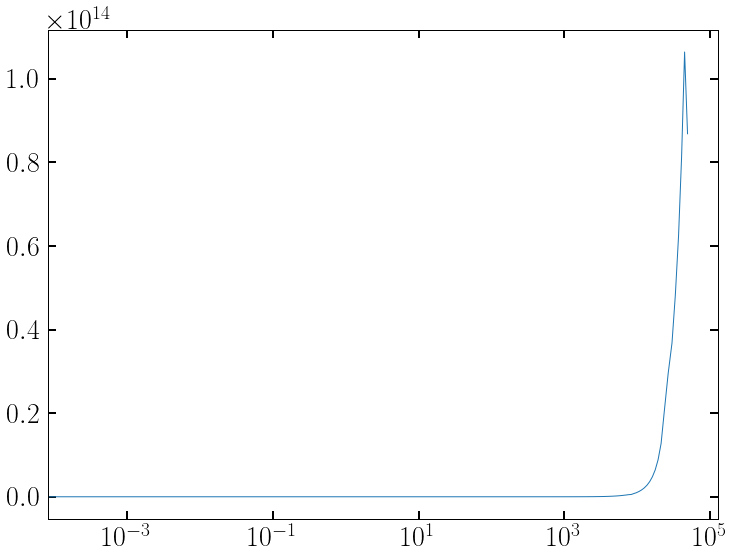

In [11]:
dr = s.r[1:] - s.r[:-1]
volume = 4*numpy.pi * (s.r[:-1])**2 * dr
pyplot.plot(s.r[:-1], volume)
pyplot.xscale("log")
pyplot.xscale("log")

3118.42603
25.75939863846907
121.05973721540785
32.24200365413477
3836.79
 No G provided, set to default: G = 0.004302
 Model scaled to: G = 0.004302, M = 3836.79, rt = 51.512

 Model properties: 
 ----------------- 
 phi0 =  5.00; B = 9.974532e-01; eta = 2.3200e-01
 fpe = 2.8628e-03
 Converged = True
 M =  3.837e+03 
 U = -5.439e+03; K = 2.719e+03; p_eV_e = 7.400e-01; Q = -K/(U+3p_eV_e) = 0.500 
 rv/rh = 1.281; rh/r0 =  2.062; rt/r0 =  23.368


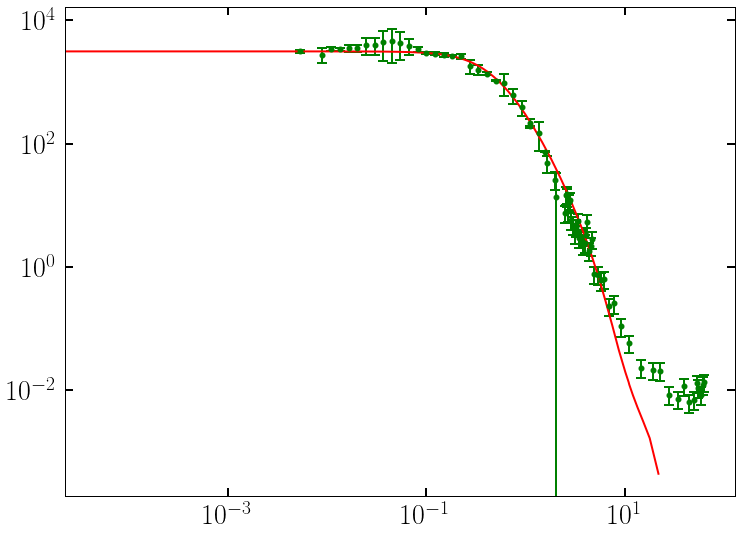

In [15]:
h96e10_id = numpy.array([convert_gc_names_from_sh_to_any(
    n.decode("ascii"), reverse=True) for n in MW_h96e10["ID"]])
imatch, = numpy.where(h96e10_id == gc_name)[0]
distance_kpc = MW_h96e10["R_Sun"][imatch]

n0 = deBoer_stitched_profiles[gc_name]["density"][0]
print(n0)

pyplot.errorbar(
    deBoer_stitched_profiles[gc_name]["rad"], 
    deBoer_stitched_profiles[gc_name]["density"],
    yerr=deBoer_stitched_profiles[gc_name]["density_err"],
    marker="o", c="g", ls="", ms=4, elinewidth=2, markeredgewidth=2, capsize=5
)
print(s.Sigma[0])

print(n0/ s.Sigma[0])
print(s.rho[0])
print(s.M)

s = limepy.spes(
    fit["W_pe"], B=B, eta=fit["eta_pe"], M=fit["M_pe"], fpe=fpe, rt=fit["rt_pe"],
    project=True, verbose=True
)

pyplot.plot(parsec2arcmin(s.R, distance_kpc), n0*s.Sigma/s.Sigma[0],
    c="r", ls="-", lw=2, label="$\\textsc{spes}$")
pyplot.xscale("log")
pyplot.yscale("log")

 No G provided, set to default: G = 0.004302
 Model scaled to: G = 0.004302, M = 3836.79, rt = 51.512

 Model properties: 
 ----------------- 
 phi0 =  5.00; B = 9.974532e-01; eta = 2.3200e-01
 fpe = 2.8628e-03
 Converged = True
 M =  3.837e+03 
 U = -5.439e+03; K = 2.719e+03; p_eV_e = 7.400e-01; Q = -K/(U+3p_eV_e) = 0.500 
 rv/rh = 1.281; rh/r0 =  2.062; rt/r0 =  23.368
 No G provided, set to default: G = 0.004302
 Model scaled to: G = 0.004302, M = 3836.79, rt = 51.512

 Model properties: 
 ----------------- 
 phi0 =  5.00; B = 9.974532e-01; eta = 2.3200e-01
 fpe = 2.8628e-03
 Converged = True
 M =  3.837e+03 
 U = -5.439e+03; K = 2.719e+03; p_eV_e = 7.400e-01; Q = -K/(U+3p_eV_e) = 0.500 
 rv/rh = 1.281; rh/r0 =  2.062; rt/r0 =  23.368




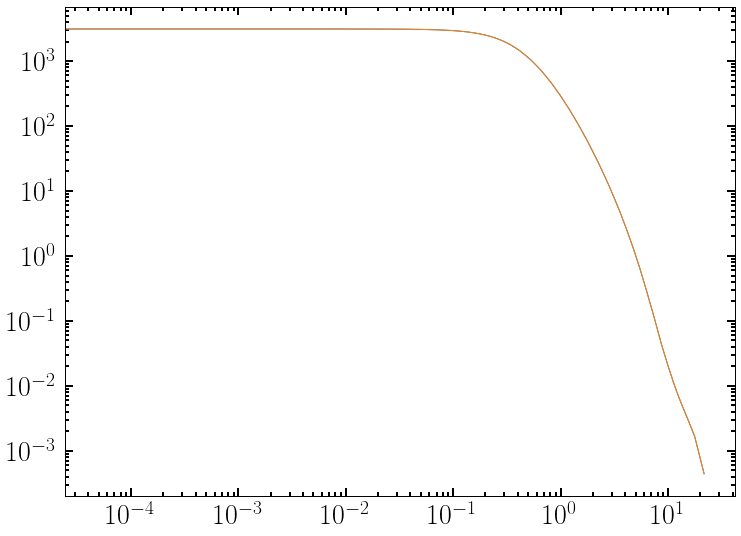

In [16]:
s = limepy.spes(
    fit["W_pe"], B=B, eta=fit["eta_pe"], M=fit["M_pe"], fpe=fpe, rt=fit["rt_pe"],
    project=True, verbose=True
)
# Now s.R is in arcmin ;-). Note that we rescale s.Sigma by observed n0=nGaia[0] and 1/s.Sigma[0]
pyplot.plot(parsec2arcmin(s.R, distance_kpc), n0*s.Sigma/s.Sigma[0], label="$\\textsc{spes}$")


s = limepy.spes(
    fit["W_pe"], B=B, eta=fit["eta_pe"], M=fit["M_pe"], fpe=fpe, rt=fit["rt_pe"],
    project=False, verbose=True
)
# _project uses self.r, which is in parsec. So if we hack this to be in arcmin, then
# calling s._project() where s.r is in arcmin will leave to s.R in arcmin, and s.Sigma in Msun/arcmin^2 =D
s_r_parsec = s.r
s_r_arcmin = parsec2arcmin(s_r_parsec, distance_kpc)
s.r = s_r_arcmin
s._project()
s.r = s_r_parsec
print("\n")
# Now s.R is in arcmin ;-). Note that we rescale s.Sigma by observed n0=nGaia[0] and 1/s.Sigma[0]
pyplot.plot(s.R, n0*s.Sigma/s.Sigma[0], label="$\\textsc{spes}$")
pyplot.xscale("log")
pyplot.yscale("log")

In [17]:
gc_name

'NGC 1261'

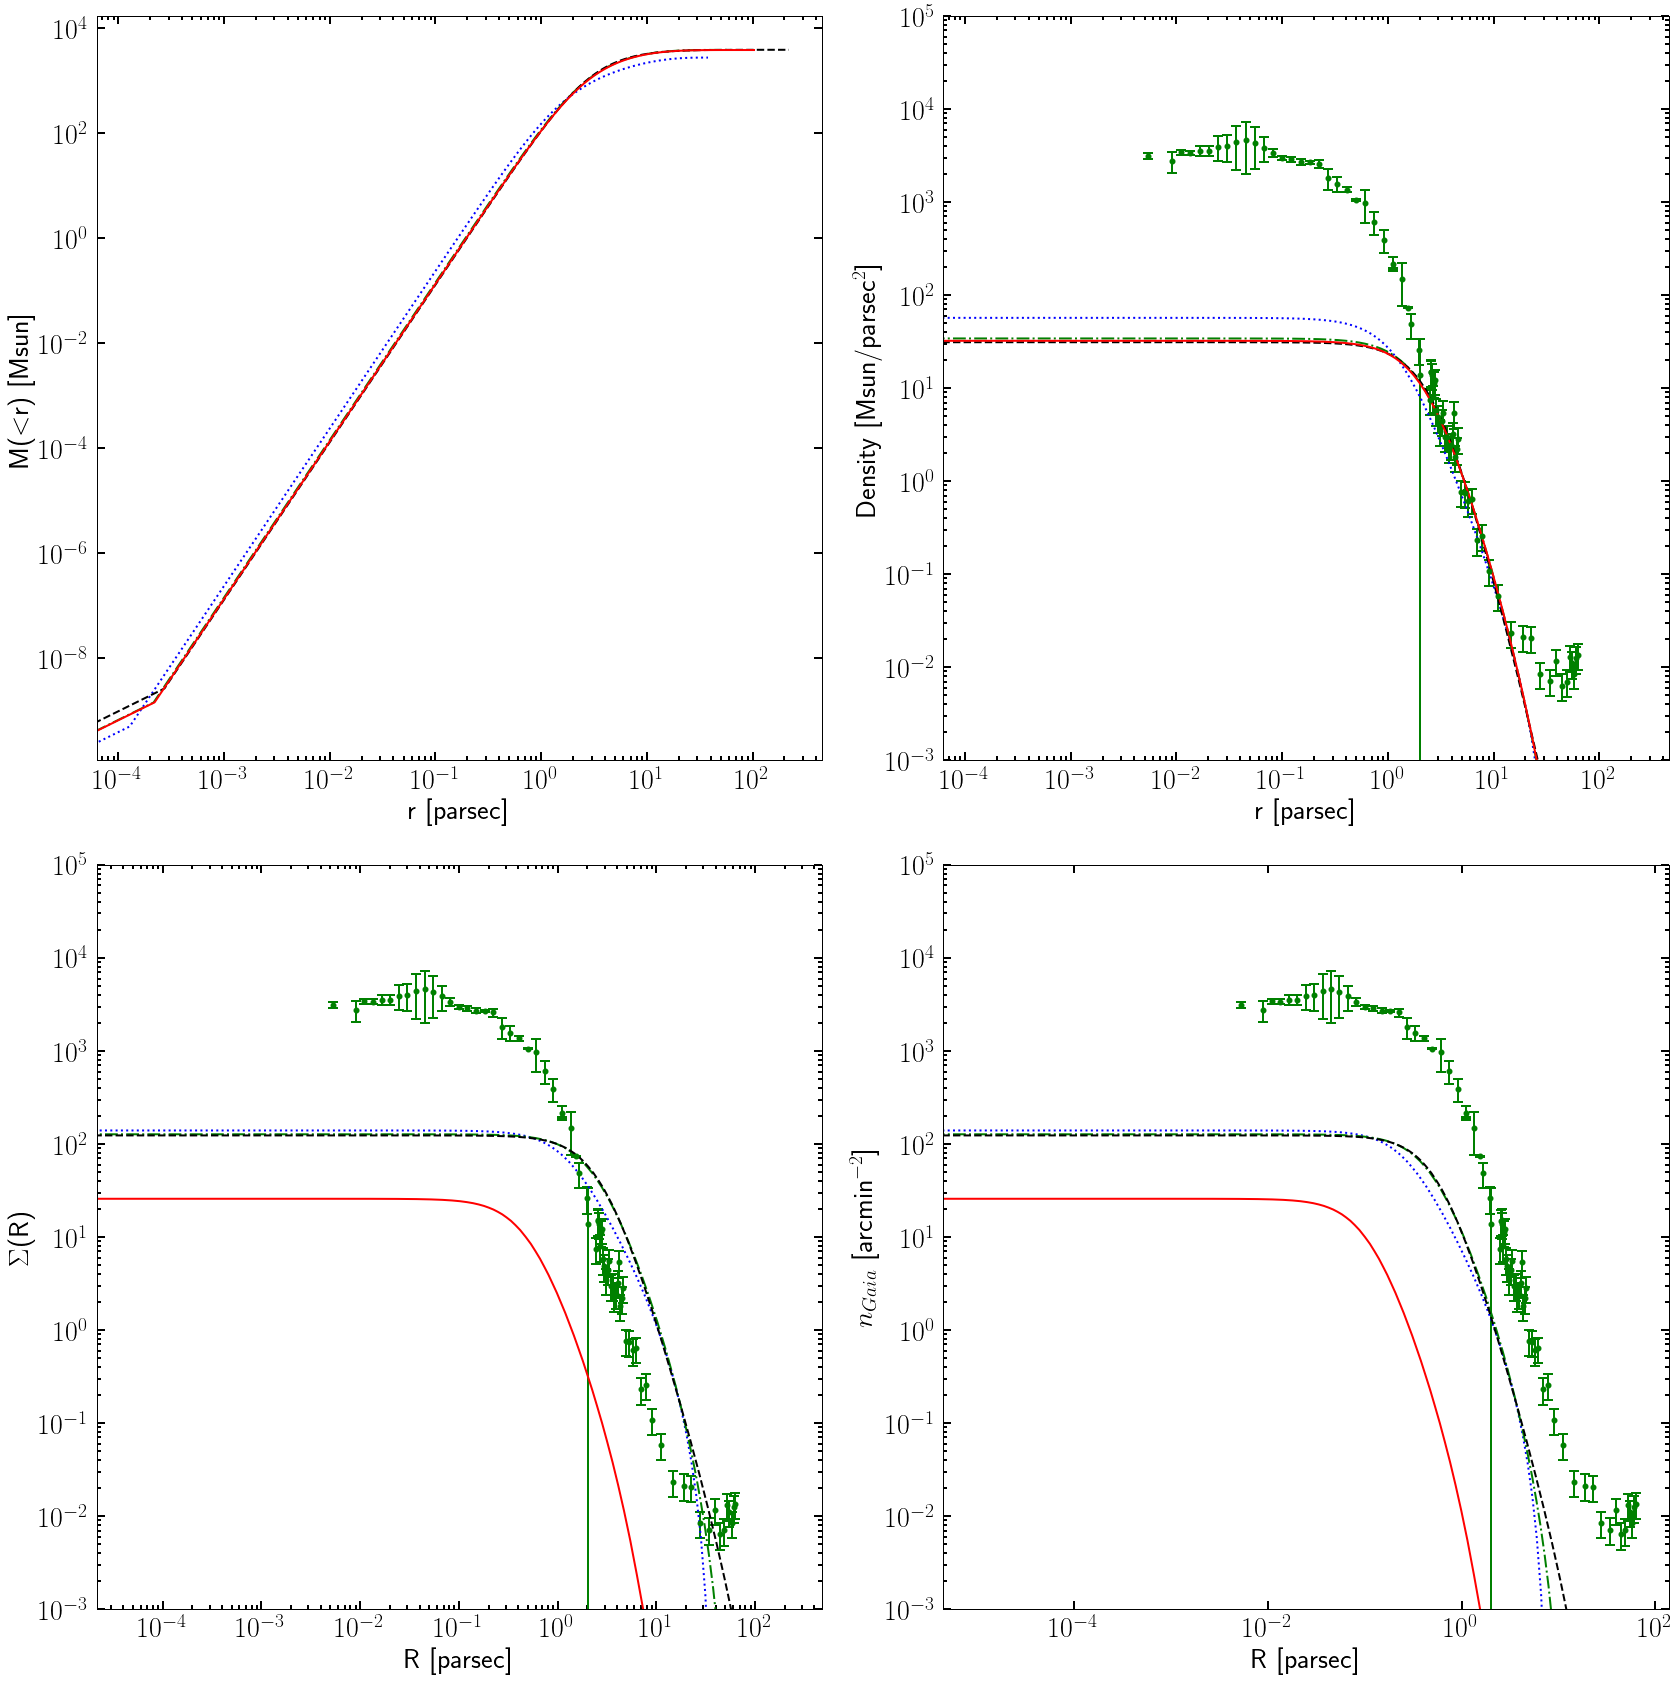

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = pyplot.subplots(2, 2, figsize=(24, 24))

for ax in [ax2, ax3, ax4]:
    ax.errorbar(
        deBoer_stitched_profiles[gc_name]["rad"], 
        deBoer_stitched_profiles[gc_name]["density"],
        yerr=deBoer_stitched_profiles[gc_name]["density_err"],
        marker="o", c="g", ls="", ms=4, elinewidth=2, markeredgewidth=2, capsize=5
    )
    # ax.set_xlim(5e-3, 9e3)
    # ax.set_ylim(1e-5, 1e4)
    ax.set_ylim(1e-3, 1e5)

ax1.plot(k.r, k.mc, c="b", ls=":", lw=2, label="King")
ax1.plot(w.r, w.mc, c="g", ls="-.", lw=2, label="Wilson")
ax1.plot(l.r, l.mc, c="k", ls="--", lw=2, label="$\\textsc{limepy}$")
ax1.plot(s.r, s.mc, c="r", ls="-", lw=2, label="$\\textsc{spes}$")
ax1.set_xlabel("r [parsec]")
ax1.set_ylabel("M($<$r) [Msun]")
ax1.set_xscale("log")
ax1.set_yscale("log")

ax2.plot(k.r, k.rho, c="b", ls=":", lw=2, label="King")
ax2.plot(w.r, w.rho, c="g", ls="-.", lw=2, label="Wilson")
ax2.plot(l.r, l.rho, c="k", ls="--", lw=2, label="$\\textsc{limepy}$")
ax2.plot(s.r, s.rho, c="r", ls="-", lw=2, label="$\\textsc{spes}$")
ax2.set_xlabel("r [parsec]")
ax2.set_ylabel("Density [Msun/parsec$^2$]")
ax2.set_xscale("log")
ax2.set_yscale("log")

ax3.plot(k.R, k.Sigma, c="b", ls=":", lw=2, label="King")
ax3.plot(w.R, w.Sigma, c="g", ls="-.", lw=2, label="Wilson")
ax3.plot(l.R, l.Sigma, c="k", ls="--", lw=2, label="$\\textsc{limepy}$")
ax3.plot(s.R, s.Sigma, c="r", ls="-", lw=2, label="$\\textsc{spes}$")
ax3.set_xlabel("R [parsec]")
ax3.set_ylabel("$\Sigma$(R)")
ax3.set_xscale("log")
ax3.set_yscale("log")

ax4.plot(parsec2arcmin(k.R, distance_kpc), k.Sigma, c="b", ls=":", lw=2, label="King")
ax4.plot(parsec2arcmin(w.R, distance_kpc), w.Sigma, c="g", ls="-.", lw=2, label="Wilson")
ax4.plot(parsec2arcmin(l.R, distance_kpc), l.Sigma, c="k", ls="--", lw=2, label="$\\textsc{limepy}$")
ax4.plot(parsec2arcmin(s.R, distance_kpc), s.Sigma, c="r", ls="-", lw=2, label="$\\textsc{spes}$")
ax4.set_xlabel("R [parsec]")
ax4.set_ylabel("$n_{Gaia}$ [arcmin$^{-2}$]")
ax4.set_xscale("log")
ax4.set_yscale("log")


pyplot.tight_layout()
pyplot.show(fig)